In [67]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [68]:
np.random.seed(0)

In [69]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [70]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [71]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images are not equal to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images are not equal to number of labels"
assert(X_train.shape[1:] == (28,28)), "The dimensions of images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of images are not 28x28"

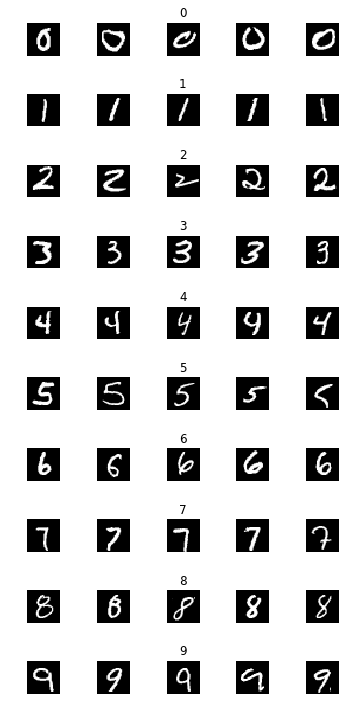

In [72]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize = (5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap =plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

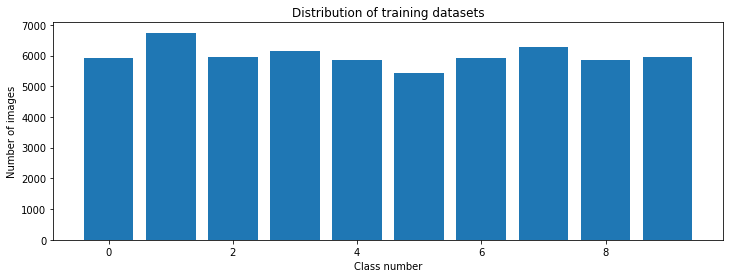

In [73]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of training datasets")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [74]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [75]:
X_train = X_train/255
X_test = X_test/255

In [76]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [77]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
    return model

In [78]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_15 (Dense)             (None, 30)                330       
_________________________________________________________________
dense_16 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                210       
Total params: 9,010
Trainable params: 9,010
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size=200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 45us/step - loss: 0.4986 - acc: 0.8466 - val_loss: 0.2530 - val_acc: 0.9248
Epoch 2/10
54000/54000 [==============================] - 2s 29us/step - loss: 0.2734 - acc: 0.9192 - val_loss: 0.1957 - val_acc: 0.9423
Epoch 3/10
54000/54000 [==============================] - 2s 36us/step - loss: 0.2378 - acc: 0.9298 - val_loss: 0.1741 - val_acc: 0.9488
Epoch 4/10
54000/54000 [==============================] - 3s 52us/step - loss: 0.2232 - acc: 0.9339 - val_loss: 0.2081 - val_acc: 0.9388
Epoch 5/10
54000/54000 [==============================] - 3s 48us/step - loss: 0.2107 - acc: 0.9368 - val_loss: 0.1886 - val_acc: 0.9413
Epoch 6/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.2017 - acc: 0.9387 - val_loss: 0.1961 - val_acc: 0.9438
Epoch 7/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.1972 - acc: 0.9405 - val_loss: 0.1975 - val_acc:

Text(0.5,0,'epoch')

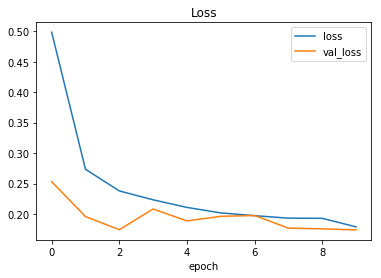

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

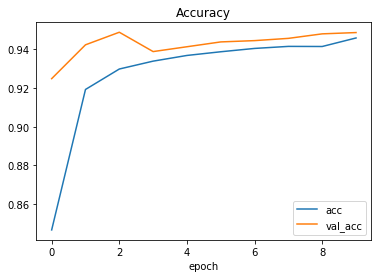

In [81]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [82]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score', score[0])
print('Test accuracy', score[1])

<class 'list'>
Test score 0.21450649326257407
Test accuracy 0.9362


<Response [200]>


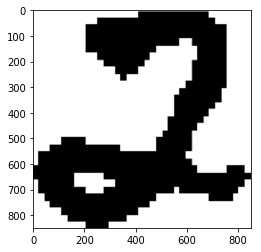

In [83]:
import requests
from PIL import Image

url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

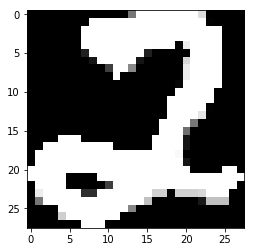

In [84]:
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [85]:
image = image/255
image = image.reshape(1, 784)

In [86]:
prediction = model.predict_classes(image)
print("Predicted digit: ", str(prediction))

Predicted digit:  [2]
